# Plotting 2D arrays


### Generating meshes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

In [3]:
v

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [4]:
X,Y = np.meshgrid(u,v)
Z = np.sin(3*np.sqrt(X**2 + Y**2))

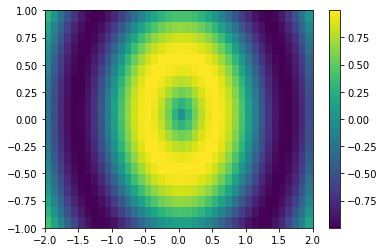

In [12]:
plt.pcolor(X, Y, Z)
# plt.savefig('sine_mesh.png')
plt.colorbar()
plt.axis('tight')
plt.show()

### Contour & filled contour plots

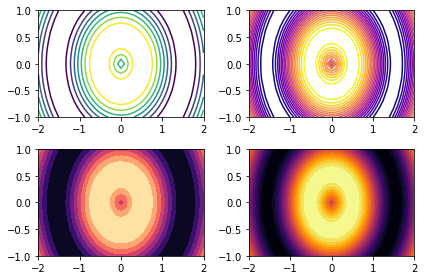

In [6]:
plt.subplot(2,2,1)
plt.contour(X,Y,Z, cmap='viridis')

plt.subplot(2,2,2)
plt.contour(X,Y,Z, 20, cmap='plasma')

plt.subplot(2,2,3)
plt.contourf(X,Y,Z, cmap='magma')

plt.subplot(2,2,4)
plt.contourf(X,Y,Z, 20, cmap='inferno')

plt.tight_layout()

plt.show()

### Modifying colormaps

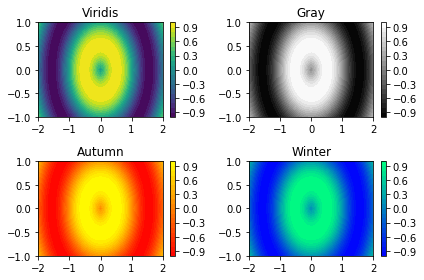

In [7]:
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20, cmap='winter')
plt.colorbar()
plt.title('Winter')

plt.tight_layout()
plt.show()

### Using hist2d()

In [8]:
file = pd.read_csv('auto-mpg.csv')
file.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [9]:
hp = file['hp'].values
mpg = file['mpg'].values

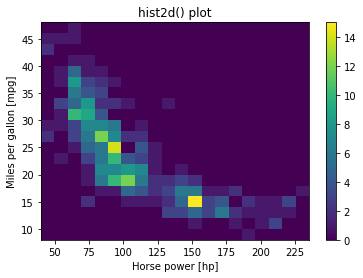

In [13]:
plt.hist2d(hp,mpg,bins=(20,20), range=((40,235),(8,48)))
plt.colorbar()
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()

### Using hexbin()

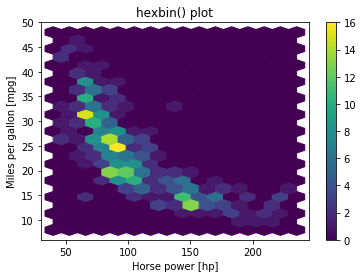

In [14]:
plt.hexbin(hp,mpg,gridsize=(15,12),extent=(40, 235, 8, 48))

plt.colorbar()
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()

### Loading, examining images

In [15]:
img = plt.imread('sunflower.jpg')
img.shape

(5184, 3888, 3)

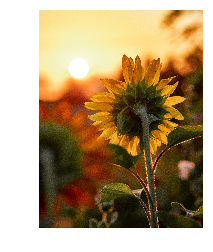

In [16]:
plt.imshow(img)
plt.axis('off')
plt.show()

### Pseudocolor plot from image data

In [17]:
intensity = img.sum(axis=2)
intensity.shape

(5184, 3888)

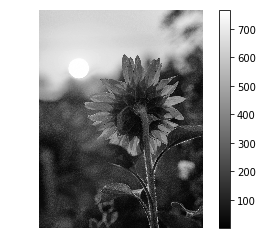

In [18]:
plt.imshow(intensity, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

### Extent and aspect

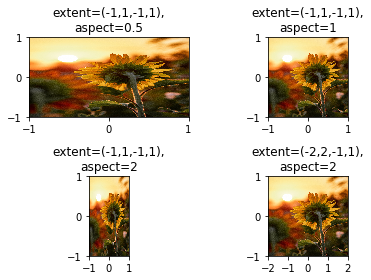

In [19]:
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-2,2,-1,1), aspect=2)

plt.tight_layout()
plt.show()

### Rescaling pixel intensities

In [20]:
image = plt.imread('image.jpg')

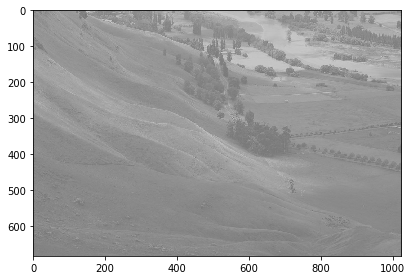

In [33]:
plt.imshow(image)
plt.tight_layout()
plt.show()

In [36]:
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

rescaled_image = 256*(image - pmin) / (pmax - pmin)
rescaled_image = rescaled_image.astype(int)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

The smallest & largest pixel intensities are 114 & 208.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


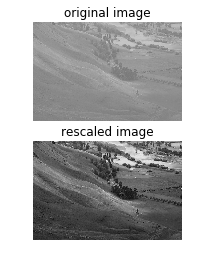

In [30]:
plt.subplot(2,1,1)
plt.title('original image')
plt.axis('off')
plt.imshow(image)

plt.subplot(2,1,2)
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)

plt.show()